In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import os

## Loading MPEC results for each DA from 'Model_CVS'

In [138]:
print("Loading results from:")
files_path = os.path.realpath(os.path.join(os.path.abspath(''), "Model_CSV"))
print("\t",files_path)
files_name = 'Model_data_DA_'
append_name ="_20221017-182603"
ncda = 9

data = []
for j in range(1,ncda+1):
    path = os.path.join(files_path,files_name+str(j)+append_name+'.csv')
    print("Reading file {} : {}".format(j,path))
    data.append(pd.read_csv(path))

Loading results from:
	 D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV
Reading file 1 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV\Model_data_DA_1_20221017-182603.csv
Reading file 2 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV\Model_data_DA_2_20221017-182603.csv
Reading file 3 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV\Model_data_DA_3_20221017-182603.csv
Reading file 4 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV\Model_data_DA_4_20221017-182603.csv
Reading file 5 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV\Model_data_DA_5_20221017-182603.csv
Reading file 6 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV\Model_data_DA_6_20221017-1826

## Loading Matlab Linear code results

In [139]:
files_name = 'results_lin_comp_market_10-17-2022@20.41.xlsx'
lin_da_buy = pd.read_excel(files_name,'da_buy', header=None)
lin_da_sell = pd.read_excel(files_name,'da_sell', header=None)
lin_da_price = pd.read_excel(files_name,'Competitive LMPs', header=None)
lin_da_port_balance = pd.read_excel(files_name,'Protfolio Balance', header=None)
lin_Competitive_Profit = pd.read_excel(files_name,'Competitive Profit', header=None)

In [151]:
# Linear model Optimal profit for each DA in each Hour
lin_Competitive_Profit

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-5.684342e-14,-5.684342e-14,60.0,90.0,105.614565,-35.450581,120.0,-30.0,-28.302194,123.181912,...,90.0,60.0,-5.684342e-14,-5.684342e-14,-5.684342e-14,-5.684342e-14,0,0,0,0
1,-5.684342e-14,-5.684342e-14,60.0,90.0,105.614565,114.549419,-30.0,120.0,-28.302194,123.181912,...,90.0,60.0,-5.684342e-14,-5.684342e-14,-5.684342e-14,-5.684342e-14,0,0,0,0
2,-5.684342e-14,-5.684342e-14,60.0,90.0,105.614565,114.549419,120.0,-30.0,-28.302194,123.181912,...,90.0,60.0,-5.684342e-14,-5.684342e-14,-1.500000e+02,-5.684342e-14,0,0,0,0
3,-1.500000e+02,-1.500000e+02,60.0,90.0,105.614565,114.549419,-30.0,120.0,-28.302194,-26.818088,...,90.0,60.0,-1.500000e+02,0.000000e+00,-1.500000e+02,0.000000e+00,0,0,0,0
4,-1.136868e-13,0.000000e+00,60.0,90.0,105.614565,114.549419,-30.0,-30.0,121.697806,123.181912,...,90.0,60.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0
5,-1.136868e-13,0.000000e+00,60.0,90.0,105.614565,-35.450581,120.0,-30.0,121.697806,-26.818088,...,90.0,60.0,0.000000e+00,0.000000e+00,-1.500000e+02,0.000000e+00,0,0,0,0
6,-1.500000e+02,0.000000e+00,60.0,90.0,105.614565,-35.450581,-30.0,120.0,121.697806,-26.818088,...,90.0,60.0,0.000000e+00,-1.500000e+02,0.000000e+00,0.000000e+00,0,0,0,0
7,-1.500000e+02,0.000000e+00,60.0,90.0,105.614565,114.549419,-30.0,120.0,-28.302194,-26.818088,...,90.0,60.0,0.000000e+00,-1.500000e+02,0.000000e+00,-1.500000e+02,0,0,0,0
8,-1.136868e-13,0.000000e+00,60.0,90.0,105.614565,114.549419,120.0,-30.0,121.697806,-26.818088,...,90.0,60.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0


### MPEC PROFIT from data

In [141]:
da_loc = np.array([[0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0],
[1,1,1,0,0,0,0,0,0],
[0,0,0,1,1,1,0,0,0],
[0,0,0,0,0,0,1,1,1],
[0,0,0,0,0,0,0,0,0]])

bus_col = []
for i in range(1,7):
    bus_col.append('Bus'+str(i)+'_price')

MVA=30

bus_price = data[0][data[0].Iteration==1][bus_col].to_numpy().transpose()

da_sell_list=[]
for df in data:
    da_sell_list.append(df[df.Iteration==1]['DAs_generation\nE_DAs_G'].tolist())

da_buy_list=[]
for df in data:
    da_buy_list.append(df[df.Iteration==1]['DAs_load\nE_DAs_L'].tolist())

da_sell = np.array(da_sell_list)
da_buy  = np.array(da_buy_list)

price_mat = np.matmul(da_loc.T,bus_price)
amount_mat = da_sell*MVA-da_buy*MVA

Mpec_profit = np.multiply(amount_mat, price_mat)

In [142]:
Mpec_df = pd.DataFrame(Mpec_profit)

In [143]:
# Mpec_df.mean().plot(kind='line')
# lin_Competitive_Profit.mean().plot(kind="line")

### Compare System Cost (DAs Costs)

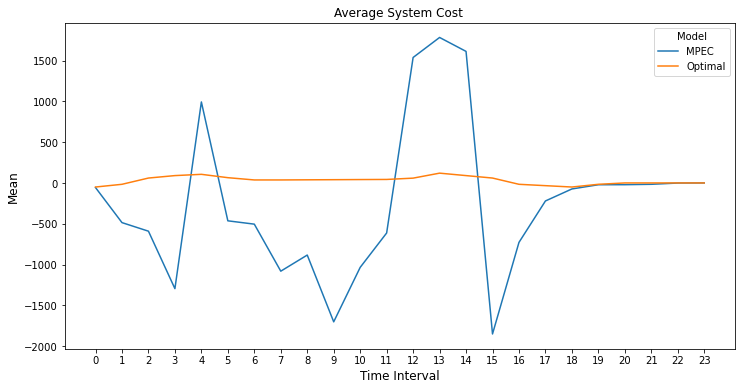

In [155]:
result= dict()
result['MPEC'] = Mpec_df.mean().to_list()
result['Optimal'] = lin_Competitive_Profit.mean().to_list()
result['Time'] = [x for x in range(24)]

result_df = pd.DataFrame(result)
result_df = result_df.melt(id_vars='Time',var_name='Model', value_name='Value')
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

sns.lineplot(data= result_df,  x='Time', y='Value', hue='Model')#hue='category'
axes.set(xticks=[x for x in range(24)]);
axes.set_title("Average System Cost ", fontsize=12)
axes.set_xlabel('Time Interval',fontsize=12);
axes.set_ylabel('Mean',fontsize=12);

In [136]:
sum(result_df[result_df.Model=='MPEC'].Value), sum(result_df[result_df.Model=='Optimal'].Value)

(-5723.804345490183, 701.5849327336541)